<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/skan_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

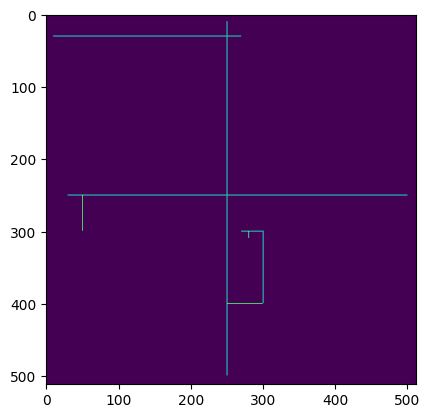

In [9]:
import numpy as np
a1 = np.zeros((512,512))
a1[250,30:500] = 1
a1[10:500,250] = 1
a1[30,10:250] =1
a1[30,250:270] =1
a1[250:300,50] =1
a1[400,250:300] =1
a1[300:400,300] =1
a1[300,270:300] =1
a1[300:310,280] =1
from matplotlib import pyplot as plt
plt.imshow(a1)

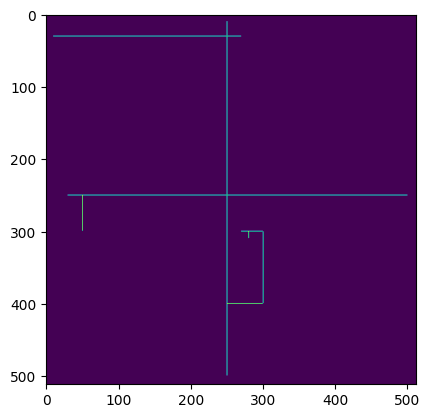

In [10]:
from skimage.morphology import skeletonize
a2 = skeletonize(a1)
plt.imshow(a2)

https://skeleton-analysis.org/stable/getting_started/getting_started.html

In [3]:
pip install skan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 30.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.20.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.


In [12]:
from skan import Skeleton, summarize
branch_data = summarize(Skeleton(a2, spacing=1))

The branch type is coded by number as:

0 endpoint-to-endpoint (isolated branch) \n

1 junction-to-endpoint \n

2 junction-to-junction \n

3 isolated cycle

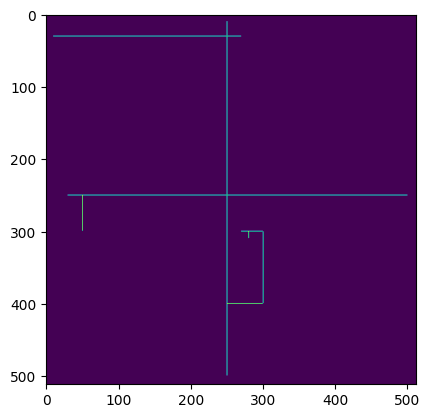

In [13]:
plt.imshow(a2)

In [14]:
branch_data

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,0,260,20.000000,1,1.0,0.0,10,250,30,250,10,250,30,250,20.000000
1,0,20,260,240.000000,1,1.0,0.0,30,10,30,250,30,10,30,250,240.000000
2,0,260,279,19.000000,1,1.0,0.0,30,250,30,269,30,250,30,269,19.000000
3,0,260,719,220.000000,2,1.0,0.0,30,250,250,250,30,250,250,250,220.000000
4,0,499,519,20.000000,1,1.0,0.0,250,30,250,50,250,30,250,50,20.000000
5,0,519,719,200.000000,2,1.0,0.0,250,50,250,250,250,50,250,250,200.000000
6,0,519,1065,49.000000,1,1.0,0.0,250,50,299,50,250,50,299,50,49.000000
7,0,719,968,249.000000,1,1.0,0.0,250,250,250,499,250,250,250,499,249.000000
8,0,719,1305,150.000000,2,1.0,0.0,250,250,400,250,250,250,400,250,150.000000
9,0,1068,1078,10.000000,1,1.0,0.0,300,270,300,280,300,270,300,280,10.000000


4 juntction to junction
special attention to segment #10,

J-shaped, from branch point to branch point

9 end to junction

https://skeleton-analysis.org/stable/examples/sholl_analysis.html

In [15]:
import pandas as pd
from skan import Skeleton, sholl_analysis

# make the skeleton object
skeleton = Skeleton(a2)
# define the neuron center/soma
center = np.array([250, 250])
# define radii at which to measure crossings
radii = np.arange(4, 250, 50)
# perform sholl analysis
center, radii, counts = sholl_analysis(
        skeleton, center=center, shells=radii
        )
table = pd.DataFrame({'radius': radii, 'crossings': counts})
table

,radius,crossings
0,4,4
1,54,5
2,104,5
3,154,6
4,204,5


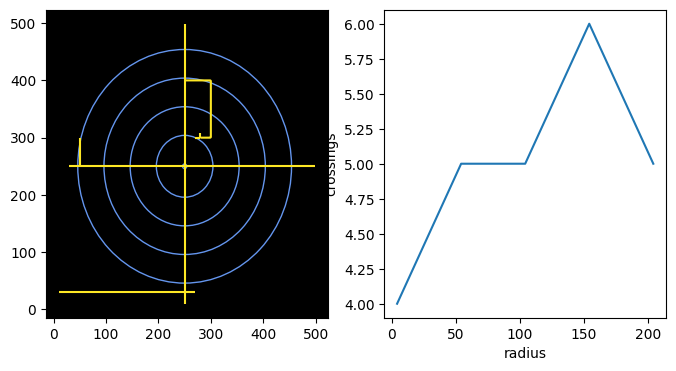

In [20]:
from skan import draw

# make two subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# draw the skeleton
draw.overlay_skeleton_2d_class(
        skeleton, skeleton_colormap='viridis_r', vmin=0, axes=ax0
        )
# draw the shells
draw.sholl_shells(center, radii, axes=ax0)
# fiddle with plot visual aspects
ax0.autoscale_view()
ax0.set_facecolor('black')

# in second subplot, plot the Sholl analysis
ax1.plot('radius', 'crossings', data=table)
ax1.set_xlabel('radius')
ax1.set_ylabel('crossings')

plt.show()